In [1]:
# import all the require modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [3]:
mining_df = pd.read_csv("mining_data.csv")
mining_df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3196.680000,542.694333,396.284000,10.158367,1.668070,249.796333,250.275667,248.668000,...,250.547000,464.978667,490.450333,443.465000,442.856333,438.782333,452.248333,466.300667,67.06,1.11
1,55.20,16.98,3213.673333,540.649333,397.949333,10.156600,1.664973,249.536000,250.752000,250.968333,...,249.807000,445.001000,362.894667,442.748333,471.045333,445.239667,443.630667,426.921667,67.06,1.11
2,55.20,16.98,3180.080000,535.929333,397.305000,10.154800,1.661877,249.576000,250.279667,251.001333,...,249.686667,443.574667,478.916333,432.779333,437.401667,441.761000,490.824667,478.046667,67.06,1.11
3,55.20,16.98,3196.713333,535.102000,397.010667,10.153067,1.658780,249.380333,248.799333,250.241333,...,249.926333,440.731333,488.994000,452.461333,439.572667,434.027333,457.083667,458.815667,67.06,1.11
4,55.20,16.98,3111.723333,532.735000,395.263667,10.151300,1.655680,249.426667,252.209667,249.243333,...,249.975667,445.851667,418.860000,462.936667,454.948333,453.571667,446.831667,426.600000,67.06,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245695,49.75,23.20,2961.490000,452.658667,381.784667,9.615990,1.654507,300.351000,295.703667,298.312667,...,321.464444,404.055667,523.933667,880.286833,331.448333,500.245000,424.037667,400.798000,64.27,1.71
245696,49.75,23.20,2851.376667,470.843333,384.250000,9.617760,1.654413,299.978667,304.478333,301.176667,...,335.351222,417.104667,548.184333,883.347000,388.821000,482.577333,338.373000,371.803333,64.27,1.71
245697,49.75,23.20,2729.876667,463.040667,383.073667,9.619523,1.654070,302.416667,299.060000,299.929000,...,291.529000,386.853000,546.765000,870.141667,435.600333,488.983667,420.578667,366.426333,64.27,1.71
245698,49.75,23.20,2698.756667,460.303667,384.490667,9.620873,1.653653,302.603000,299.953333,299.483667,...,285.945000,395.502667,443.776333,872.247333,416.832667,495.943333,437.163000,417.842667,64.27,1.71


In [5]:
mining_df.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [7]:
mining_df.isnull().sum()

% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [9]:
mining_df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,...,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000
mean,56.294974,14.651438,2869.241181,488.144186,397.577332,9.767534,1.680348,280.166032,277.172893,281.097236,...,290.774336,520.242050,522.648563,531.355055,420.306805,425.237994,429.927646,421.006767,65.049435,2.327228
std,5.158958,6.808961,1187.990184,90.736360,9.468496,0.387036,0.069213,29.616570,29.936823,28.537193,...,28.158596,130.389539,127.450562,150.614529,90.566437,83.601851,85.320602,83.736727,1.118479,1.125623
min,42.740000,1.310000,0.074147,241.699632,376.272600,8.753370,1.519829,175.666333,175.923177,176.471917,...,186.074077,149.451600,211.266111,126.352031,162.293185,167.139620,161.485667,175.908240,62.050000,0.600000
25%,52.670000,8.940000,2073.322500,432.204667,395.212583,9.527158,1.647197,250.268667,250.367333,250.693667,...,263.524333,413.516320,442.291000,410.134583,356.440167,357.074583,358.078583,356.567833,64.370000,1.440000
50%,56.080000,13.850000,2994.311667,504.510667,399.354833,9.797963,1.697560,299.418000,297.433000,299.048333,...,299.350833,492.971167,496.380667,494.859500,410.511667,408.022833,419.931167,410.043333,65.210000,2.000000
75%,59.720000,19.600000,3712.951667,553.479083,402.458750,10.037833,1.728257,300.127333,300.435000,300.308667,...,301.239667,594.960083,595.989167,601.060000,486.533417,485.580833,490.725500,475.922283,65.860000,3.010000
max,65.780000,33.400000,6295.130657,739.422405,418.625439,10.808046,1.853229,372.387588,369.550000,359.948635,...,370.190800,862.197932,828.593000,886.820204,680.019967,675.571459,698.621871,659.618696,68.010000,5.530000


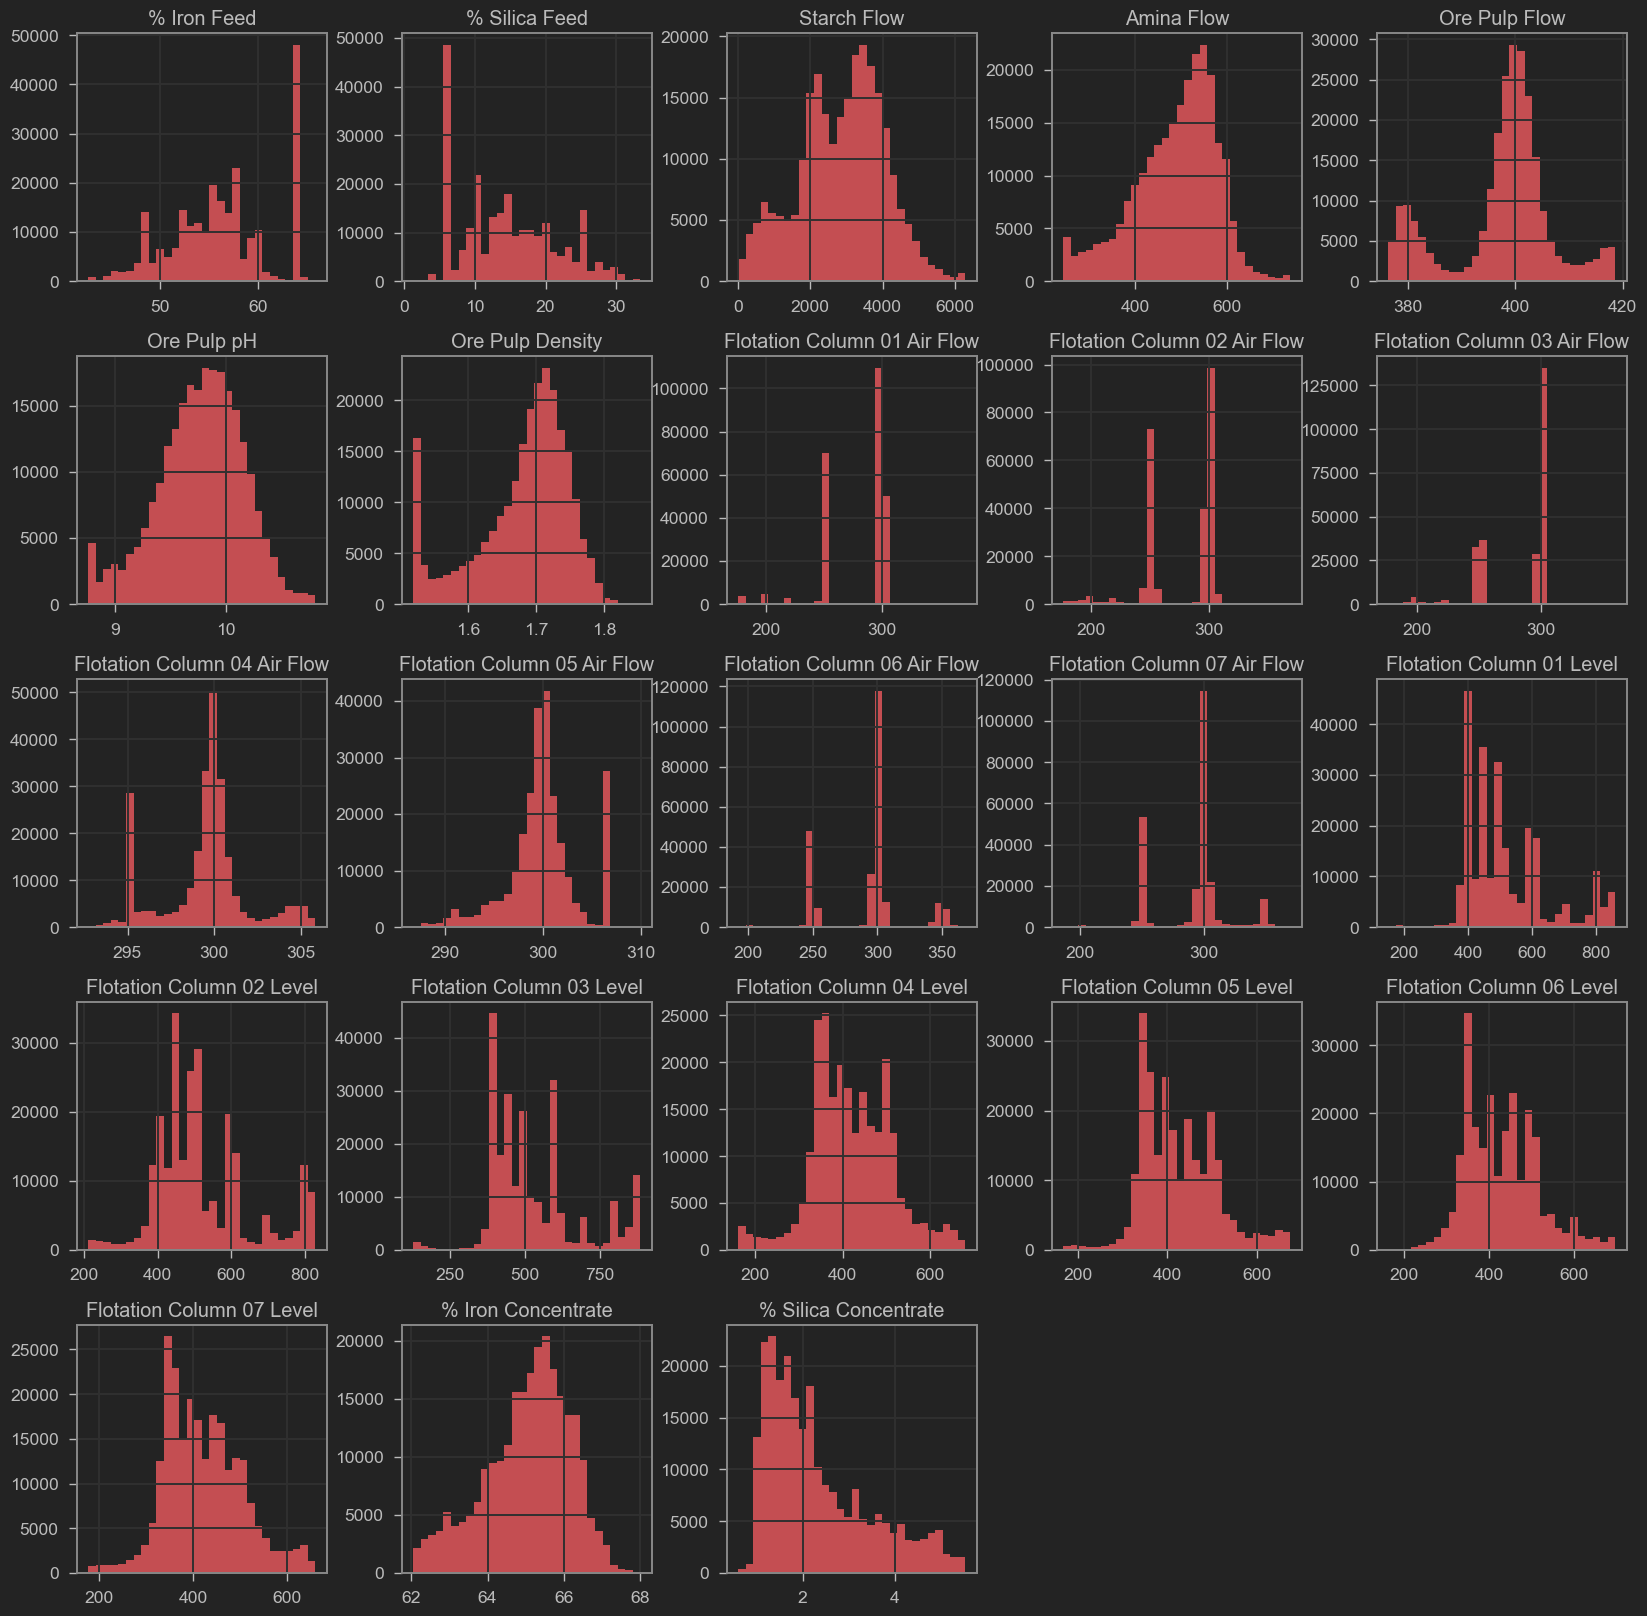

In [11]:
mining_df.hist(bins = 30,figsize=(20,20),color = 'r')
plt.show()

In [13]:
mining_df.corr()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.971837,0.028644,-0.088595,0.164676,0.007496,-0.125583,-0.062448,-0.170716,-0.062318,...,-0.016722,0.029619,0.020928,0.015189,0.016346,0.023571,0.003910,0.026100,0.055526,-0.077108
% Silica Feed,-0.971837,1.000000,-0.016489,0.079065,-0.154508,0.007953,0.104567,0.091833,0.183953,0.084325,...,0.046193,-0.038417,-0.037113,-0.022653,-0.034534,-0.044270,-0.020568,-0.047079,-0.044292,0.072778
Starch Flow,0.028644,-0.016489,1.000000,0.261934,0.044926,0.269135,0.231530,0.195538,0.192244,0.187602,...,0.202817,-0.302567,-0.286336,-0.309177,-0.013037,-0.057417,-0.077105,-0.039584,0.071303,-0.068008
Amina Flow,-0.088595,0.079065,0.261934,1.000000,0.219162,0.124254,0.659461,0.111994,0.124490,0.102632,...,0.081561,-0.270753,-0.236452,-0.288484,-0.183739,-0.215334,-0.209496,-0.171384,-0.111045,0.157644
Ore Pulp Flow,0.164676,-0.154508,0.044926,0.219162,1.000000,0.121256,0.012571,-0.141215,-0.122322,-0.144232,...,-0.146904,-0.008877,-0.008335,-0.055890,-0.010212,0.002158,-0.018051,0.017185,0.085098,0.008519
Ore Pulp pH,0.007496,0.007953,0.269135,0.124254,0.121256,1.000000,0.115073,0.163433,0.146264,0.193887,...,0.178322,-0.166525,-0.154391,-0.140251,0.046933,0.013095,-0.079157,0.019193,0.192705,-0.147550
Ore Pulp Density,-0.125583,0.104567,0.231530,0.659461,0.012571,0.115073,1.000000,-0.004695,0.026413,-0.031237,...,-0.052655,-0.112201,-0.093542,-0.149823,-0.089066,-0.142675,-0.105346,-0.087454,0.015116,0.047413
Flotation Column 01 Air Flow,-0.062448,0.091833,0.195538,0.111994,-0.141215,0.163433,-0.004695,1.000000,0.854298,0.955256,...,0.658199,-0.443870,-0.428294,-0.372533,-0.062665,-0.092254,-0.125196,-0.112074,0.099239,-0.219698
Flotation Column 02 Air Flow,-0.170716,0.183953,0.192244,0.124490,-0.122322,0.146264,0.026413,0.854298,1.000000,0.866927,...,0.592888,-0.437313,-0.428303,-0.368913,-0.075833,-0.112465,-0.124478,-0.114693,0.059709,-0.169029
Flotation Column 03 Air Flow,-0.062318,0.084325,0.187602,0.102632,-0.144232,0.193887,-0.031237,0.955256,0.866927,1.000000,...,0.661261,-0.443454,-0.423836,-0.365800,-0.047216,-0.064355,-0.105673,-0.086448,0.100888,-0.219593


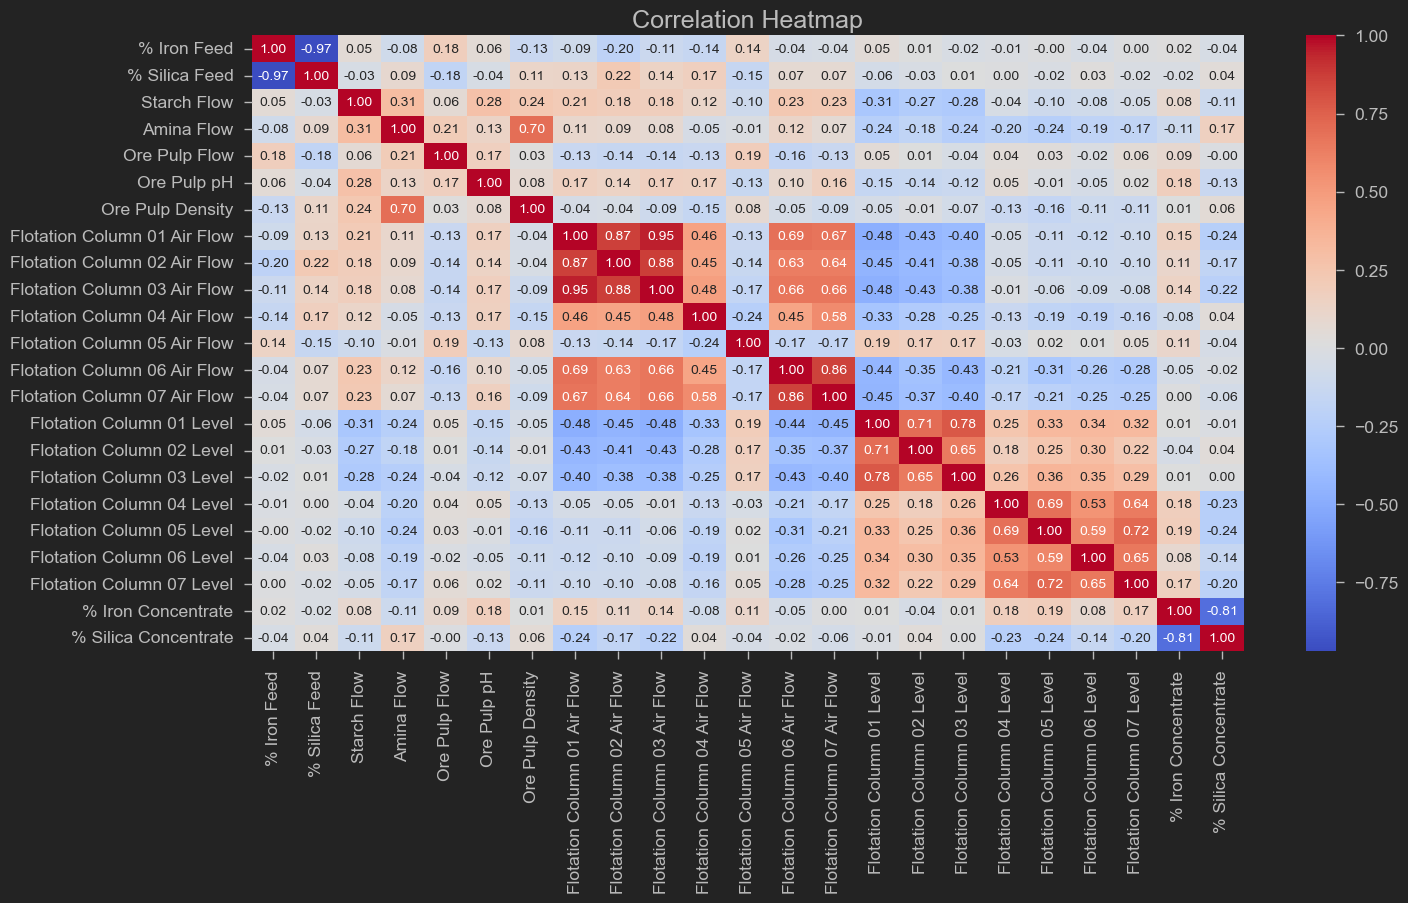

In [15]:
# In this heatmap, I have taken some 1000 samples because there are upto 245,000 rows it will take so many hours and even it may crash.

plt.figure(figsize=(16, 8))  # Adjust figure size
sampled_df = mining_df.sample(n=1000)
sns.heatmap(sampled_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

<Axes: xlabel='% Silica Concentrate', ylabel='% Iron Concentrate'>

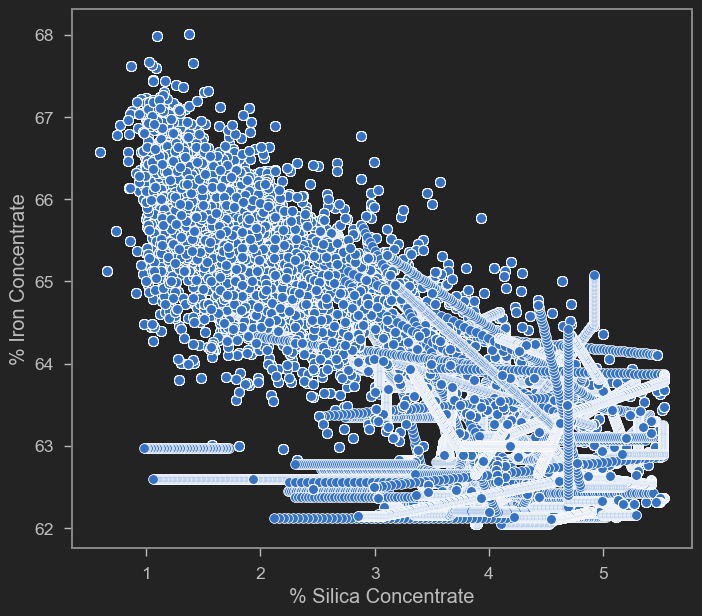

In [17]:
sns.scatterplot(x = mining_df['% Silica Concentrate'], y = mining_df['% Iron Concentrate'])

<Axes: xlabel='% Iron Feed', ylabel='% Silica Feed'>

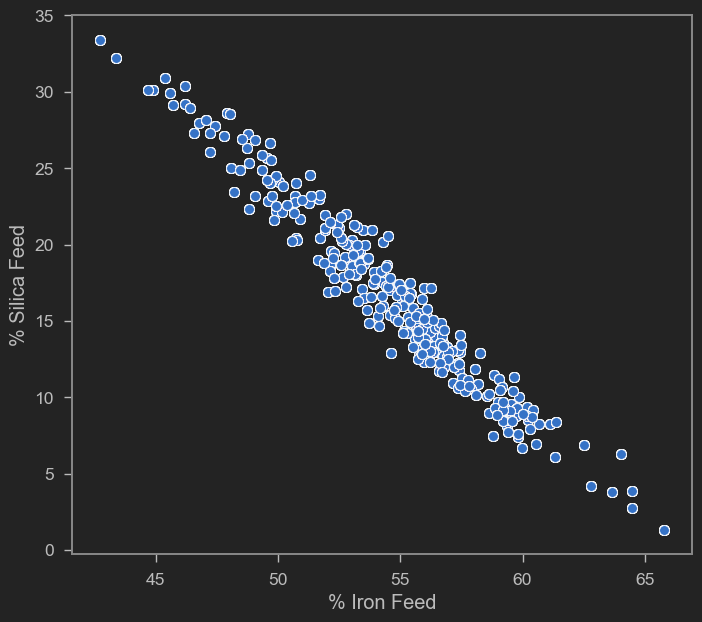

In [19]:
sns.scatterplot(x = mining_df['% Iron Feed'], y = mining_df['% Silica Feed'])

In [21]:
df_iron = mining_df.drop(columns = '% Silica Concentrate')
df_iron_target = mining_df['% Silica Concentrate']

In [23]:
df_iron.shape

(245700, 22)

In [25]:
df_iron_target.shape

(245700,)

In [27]:
df_iron = np.array(df_iron)
df_iron_target = np.array(df_iron_target)

In [29]:
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target.shape

(245700, 1)

In [31]:
# Scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_X = StandardScaler()
X = scaler_X.fit_transform(df_iron)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(df_iron_target)

In [33]:
# Train, Test and split the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [35]:
X_train.shape

(196560, 22)

In [37]:
X_test.shape

(49140, 22)

In [39]:
y_train.shape

(196560, 1)

In [41]:
y_test.shape

(49140, 1)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train,y_train)

LinearRegression()

In [45]:
accuracy_score_LinearRegression = LinearRegression_model.score(X_test,y_test)
accuracy_score_LinearRegression

0.6780076749294284

In [47]:
from sklearn.tree import DecisionTreeRegressor

Decision_tree_model = DecisionTreeRegressor()
Decision_tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [49]:
accuracy_score_DecisionTree = Decision_tree_model.score(X_test,y_test)
accuracy_score_DecisionTree

0.9806951961786485

In [51]:
from sklearn.ensemble import RandomForestRegressor

Random_forest_model = RandomForestRegressor(n_estimators = 100, max_depth = 10)
Random_forest_model.fit(X_train,y_train)

C:\Users\boddu\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10)

In [52]:
accuracy_score_RandomForest = Random_forest_model.score(X_test,y_test)
accuracy_score_RandomForest

0.8905035244002957